### Linear Regression Model to Predict Sales Based on Advertising Budgets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='Newspaper', ylabel='Sales'>

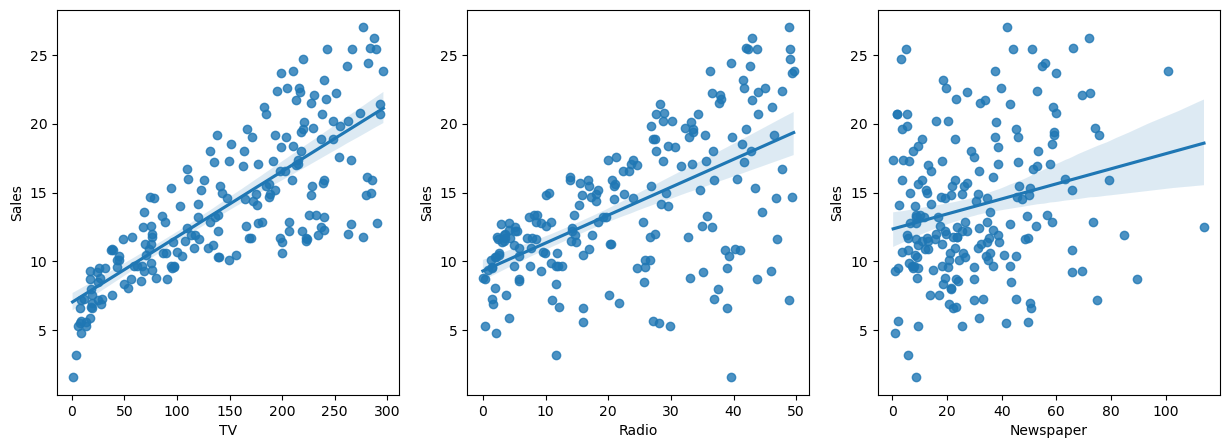

In [11]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.regplot(ax=ax1,x='TV',y='Sales',data=df)
sns.regplot(ax=ax2,x='Radio',y='Sales',data=df)
sns.regplot(ax=ax3,x='Newspaper',y='Sales',data=df)

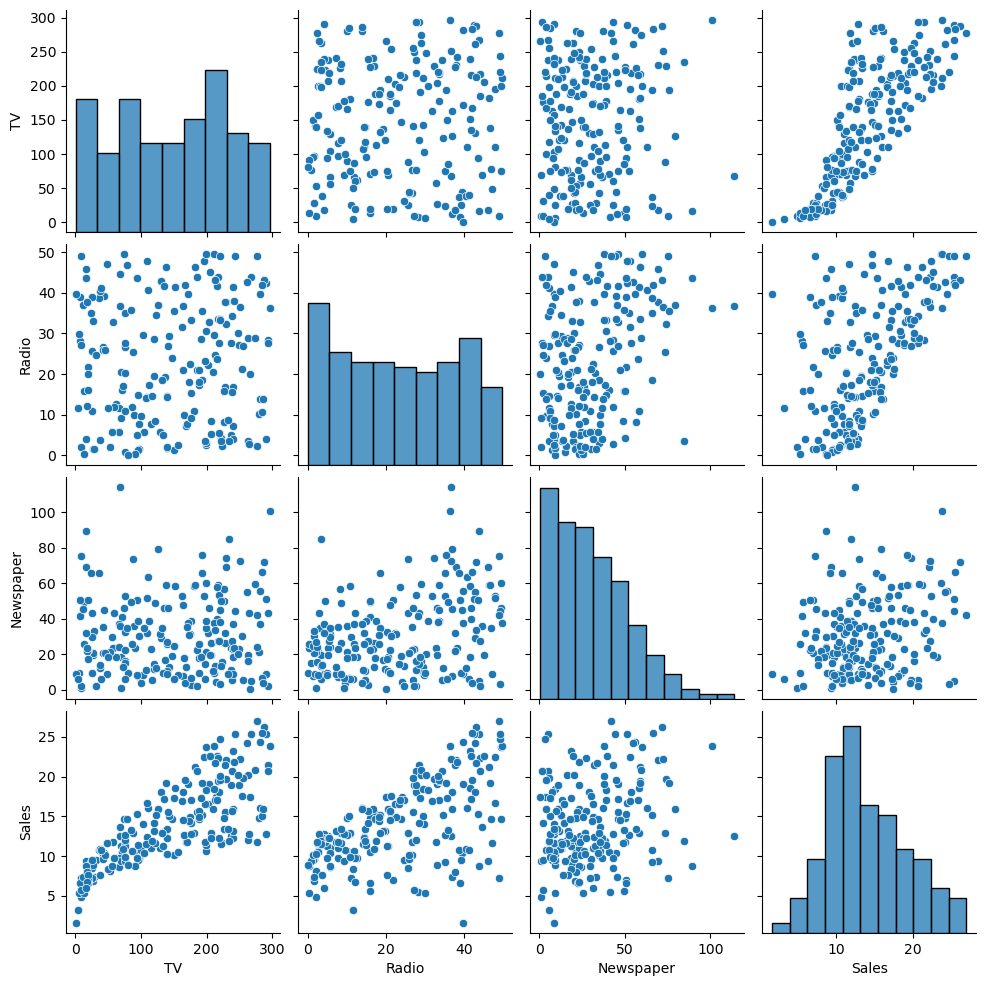

In [13]:
sns.pairplot(df)

*Scatter plots and pairplots revealed positive linear relationships between advertising budgets and sales.*

<Axes: >

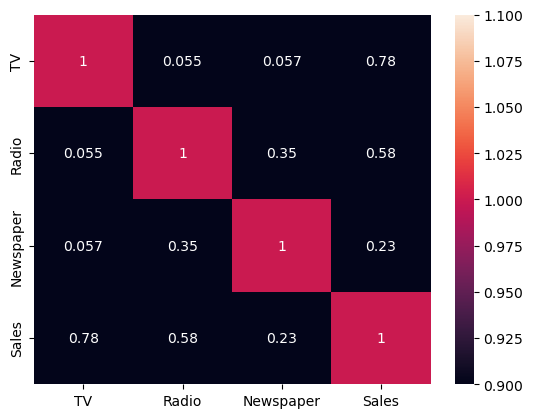

In [15]:
corr = df.corr()
sns.heatmap(df.corr(), xticklabels=corr.columns, yticklabels=corr.columns,vmin=1, vmax=1,annot=True)

*The correlation heatmap showed that TV advertising has the strongest correlation with sales, followed by Radio and Newspaper.*

In [16]:
X = df.drop(['Sales'],axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
y= df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
lm.intercept_

2.70894909251591

In [47]:
lm.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [48]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
TV,0.044059
Radio,0.199287
Newspaper,0.006882


*We concluded that increasing TV advertising budget by $1 is associated with an increase of 4.4 units in sales, holding other factors constant.*

*Similarly, a $1 increase in Radio and Newspaper advertising budgets is associated with an increase of 19.9 and 0.7 units in sales, respectively.*

In [49]:
predictions = lm.predict(X_test)

In [50]:
comp = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
comp

,Actual,Predicted
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


In [51]:
lm.score(X_test,y_test)

0.8609466508230368

*The model achieved an R-squared score of 0.861 on the test set, indicating that it can explain 86.1% of the variance in sales.*

In [52]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',metrics.mean_squared_error(y_test,predictions))

MAE:  1.5116692224549084
MSE:  3.79679723671522
RMSE:  3.79679723671522


### Conclusion

*In conclusion, the linear regression model has demonstrated its ability to accurately predict sales based on advertising budgets. 
The model can be used to guide marketing decisions and optimize advertising strategies to maximize sales.*